In [1]:
from sklearn.datasets import load_breast_cancer

# Завантаження набору даних
data = load_breast_cancer()

# Ознаки (параметри клітин)
X = data.data

# Цільова змінна (0 - злоякісна, 1 - доброякісна)
y = data.target

In [2]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


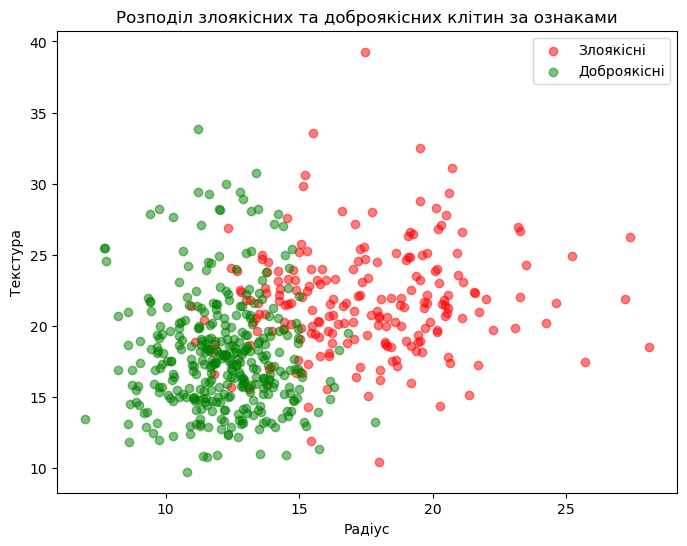

In [3]:
import matplotlib.pyplot as plt

# Приклад двох ознак: радіус і текстура
feature1 = X[:, 0]  # радіус
feature2 = X[:, 1]  # текстура

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.scatter(feature1[y == 0], feature2[y == 0], color='red', label='Злоякісні', alpha=0.5)
plt.scatter(feature1[y == 1], feature2[y == 1], color='green', label='Доброякісні', alpha=0.5)
plt.xlabel("Радіус")
plt.ylabel("Текстура")
plt.title("Розподіл злоякісних та доброякісних клітин за ознаками")
plt.legend()
plt.show()

In [4]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

In [7]:
from sklearn.metrics import f1_score

# F1-міра для спектральної кластеризації
f1_spectral = f1_score(y, spectral_labels)
print(f"F1-міра для спектральної кластеризації: {f1_spectral:.3f}")

# F1-міра для кластеризації k-means
f1_kmeans = f1_score(y, kmeans_labels)
print(f"F1-міра для кластеризації k-means: {f1_kmeans:.3f}")

# F1-міра для моделі сумішей Гаусса
f1_gmm = f1_score(y, gmm_labels)
print(f"F1-міра для моделі сумішей Гаусса: {f1_gmm:.3f}")

F1-міра для спектральної кластеризації: 0.840
F1-міра для кластеризації k-means: 0.896
F1-міра для моделі сумішей Гаусса: 0.961


In [8]:
from sklearn.decomposition import PCA

# Використовуємо PCA для зменшення розмірності до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

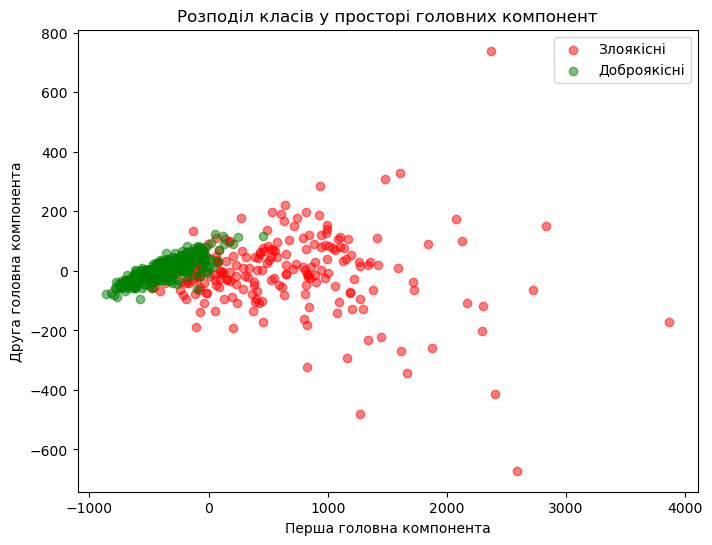

In [9]:
# Візуалізація результатів PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Злоякісні', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='green', label='Доброякісні', alpha=0.5)
plt.xlabel("Перша головна компонента")
plt.ylabel("Друга головна компонента")
plt.title("Розподіл класів у просторі головних компонент")
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

# Поділ даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення і тренування моделі логістичної регресії
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Передбачення на тестовому наборі
y_pred = log_reg.predict(X_test)

# Оцінка F1-міри і виведення матриці плутанини
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"F1-міра: {f1:.3f}")
print("Матриця плутанини:")
print(conf_matrix)

F1-міра: 0.966
Матриця плутанини:
[[39  4]
 [ 1 70]]



Testing method: bgd
F1 score for bgd: 0.7692307692307693
Confusion matrix for bgd:
[[ 2 41]
 [ 1 70]]

Testing method: mini_batch_gd
F1 score for mini_batch_gd: 0.8114285714285714
Confusion matrix for mini_batch_gd:
[[10 33]
 [ 0 71]]

Testing method: sgd
F1 score for sgd: 0.8022598870056498
Confusion matrix for sgd:
[[ 8 35]
 [ 0 71]]

Testing method: rmsprop
F1 score for rmsprop: 0.7909604519774012
Confusion matrix for rmsprop:
[[ 7 36]
 [ 1 70]]

Testing method: adam
F1 score for adam: 0.8165680473372781
Confusion matrix for adam:
[[14 29]
 [ 2 69]]

Testing method: adadelta
F1 score for adadelta: 0.8260869565217391
Confusion matrix for adadelta:
[[33 10]
 [14 57]]

Testing method: adagrad
F1 score for adagrad: 0.8549618320610687
Confusion matrix for adagrad:
[[39  4]
 [15 56]]

Testing method: adamax
F1 score for adamax: 0.8284023668639053
Confusion matrix for adamax:
[[15 28]
 [ 1 70]]

Testing method: nadam
F1 score for nadam: 0.8143712574850299
Confusion matrix for nadam:
[[15 

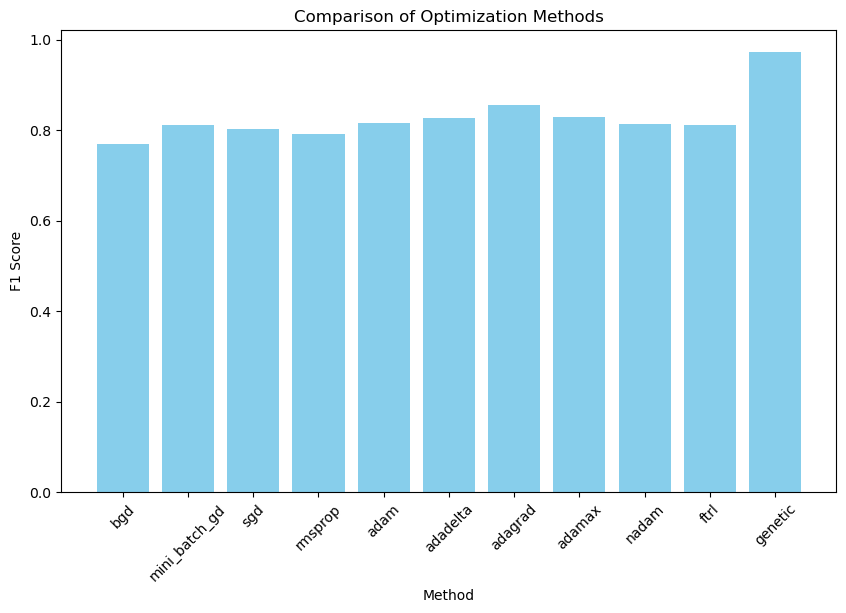

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

# Оголошуємо функцію логістичної активації
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція для тестування моделі логістичної регресії
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

def bgd(X, y, learning_rate=0.01, epochs=100):
    # Batch Gradient Descent
    # На кожній ітерації обчислюється градієнт по всьому набору даних

    # Додаємо стовпець одиниць до матриці X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Випадково ініціалізуємо вектор параметрів theta
    theta = np.random.randn(X_b.shape[1], 1)

    # Реалізація методу градієнтного спуску
    for iteration in range(epochs):
        gradients = 2 / X_b.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

    # Розділяємо параметри
    bias = theta[0, 0]      # перший елемент - зміщення
    weights = theta[1:, 0]  # решта - ваги

    return weights, bias

def sgd(X, y, learning_rate=0.01, epochs=100):
    # Stochastic Gradient Descent
    # Градієнт обчислюється для одного випадкового прикладу

    # Додаємо стовпець одиниць до матриці X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Випадково ініціалізуємо вектор параметрів theta
    theta = np.random.randn(X_b.shape[1], 1)

    for _ in range(epochs):
        for i in range(X.shape[0]):
            # Обчислюємо градієнт відносно одного випадкового прикладу
            gradient = 2 * X_b[i:i+1].T * (X_b[i:i+1] @ theta - y[i])
            # Оновлюємо параметри моделі
            theta -= learning_rate * gradient

    # Розділяємо параметри
    bias = theta[0, 0]      # перший елемент - зміщення
    weights = theta[1:, 0]  # решта - ваги

    return weights, bias

def mini_batch_gd(X, y, learning_rate=0.01, epochs=100, batch_size=32):
    # Додаємо стовпець одиниць до матриці X для врахування bias
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]

    # Ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    for epoch in range(epochs):
        # Перемішуємо дані на початку кожної епохи
        indices = np.random.permutation(m_samples)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices].reshape(-1, 1)

        # Проходимо по міні-батчах
        for start in range(0, m_samples, batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            m_batch = X_batch.shape[0]

            # Обчислюємо передбачення для міні-батчу
            predictions = X_batch.dot(theta)

            # Обчислюємо похибку та градієнт функції вартості
            error = predictions - y_batch
            grad = (1 / m_batch) * X_batch.T.dot(error)

            # Оновлюємо параметри
            theta = theta - learning_rate * grad

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def rmsprop(X, y, learning_rate=0.01, epochs=100, gamma=0.9, epsilon=1e-8):
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m = X_b.shape[0]  # кількість зразків

    # Випадкова ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізуємо акумулятор для середньоквадратичних градієнтів
    cache = np.zeros_like(theta)

    for epoch in range(epochs):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)  # форма (m, 1)
        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)
        # Обчислюємо градієнт функції вартості
        gradient = (1 / m) * X_b.T.dot(error)
        # Оновлюємо акумулятор (експоненціальне згладжування квадрата градієнтів)
        cache = gamma * cache + (1 - gamma) * gradient**2
        # Оновлюємо параметри за правилом RMSprop
        theta = theta - learning_rate * gradient / (np.sqrt(cache) + epsilon)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def adam(X, y, learning_rate=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]  # кількість зразків

    # Випадкова ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізуємо параметри для першого та другого моментів
    m_t = np.zeros_like(theta)  # середнє значення градієнтів (перший момент)
    v_t = np.zeros_like(theta)  # середнє значення квадратів градієнтів (другий момент)

    for epoch in range(1, epochs + 1):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)  # форма (m_samples, 1)
        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)
        # Обчислюємо градієнт функції вартості
        grad = (1 / m_samples) * X_b.T.dot(error)
        # Оновлюємо оцінки першого (m_t) та другого (v_t) моментів
        m_t = beta1 * m_t + (1 - beta1) * grad
        v_t = beta2 * v_t + (1 - beta2) * (grad ** 2)
        # Коригуємо упереджені оцінки моментів
        m_hat = m_t / (1 - beta1 ** epoch)
        v_hat = v_t / (1 - beta2 ** epoch)
        # Оновлюємо параметри за правилом Adam
        theta = theta - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def adadelta(X, y, learning_rate=1.0, epochs=100, gamma=0.95, epsilon=1e-6):
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]

    # Ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізація акумуляторів для квадратичних градієнтів та оновлень
    Eg = np.zeros_like(theta)   # накопичене середнє квадратичне градієнтів
    Edx = np.zeros_like(theta)  # накопичене середнє квадратичне оновлень параметрів

    for epoch in range(epochs):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)
        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)
        # Обчислюємо градієнт функції вартості
        grad = (1 / m_samples) * X_b.T.dot(error)
        # Оновлюємо накопичене середнє квадратичне градієнтів
        Eg = gamma * Eg + (1 - gamma) * (grad ** 2)
        # Обчислюємо крок оновлення параметрів згідно з AdaDelta
        delta_theta = - (np.sqrt(Edx + epsilon) / np.sqrt(Eg + epsilon)) * grad
        # (Опціонально) масштабуємо оновлення за допомогою learning_rate
        delta_theta *= learning_rate
        # Оновлюємо параметри
        theta = theta + delta_theta

        # Оновлюємо накопичене середнє квадратичне оновлень
        Edx = gamma * Edx + (1 - gamma) * (delta_theta ** 2)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def adagrad(X, y, learning_rate=0.01, epochs=100, epsilon=1e-8):
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]

    # Випадкова ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізація акумулятора для квадратів градієнтів
    G = np.zeros_like(theta)

    for epoch in range(epochs):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)
        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)
        # Обчислюємо градієнт функції вартості
        grad = (1 / m_samples) * X_b.T.dot(error)
        # Накопичуємо квадрати градієнтів для кожного параметру
        G += grad ** 2
        # Оновлюємо параметри, масштабуючи крок навчання
        theta = theta - learning_rate * grad / (np.sqrt(G) + epsilon)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def adamax(X, y, learning_rate=0.002, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]

    # Ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізація моменту (m_t) та u_t для інфінітної норми
    m_t = np.zeros_like(theta)
    u_t = np.zeros_like(theta)

    for epoch in range(1, epochs + 1):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)
        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)
        # Обчислюємо градієнт функції вартості
        grad = (1 / m_samples) * X_b.T.dot(error)
        # Оновлюємо перший момент m_t
        m_t = beta1 * m_t + (1 - beta1) * grad
        # Оновлюємо u_t як максимум згладжених абсолютних значень градієнтів
        u_t = np.maximum(beta2 * u_t, np.abs(grad))
        # Коригуємо перший момент, щоб компенсувати початкове упередження
        m_hat = m_t / (1 - beta1 ** epoch)
        # Оновлюємо параметри за правилом Adamax
        theta = theta - (learning_rate * m_hat) / (u_t + epsilon)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def nadam(X, y, learning_rate=0.002, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Додаємо стовпець одиниць до матриці X для врахування bias
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples = X_b.shape[0]

    # Випадкова ініціалізація параметрів (включаючи bias)
    theta = np.random.randn(X_b.shape[1], 1)

    # Ініціалізація змінних для першого (m) та другого (v) моментів
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)

    for epoch in range(1, epochs + 1):
        # Обчислюємо передбачення
        predictions = X_b.dot(theta)

        # Обчислюємо похибку
        error = predictions - y.reshape(-1, 1)

        # Обчислюємо градієнт функції вартості
        grad = (1 / m_samples) * X_b.T.dot(error)

        # Оновлюємо перший момент
        m = beta1 * m + (1 - beta1) * grad
        # Оновлюємо другий момент
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Коригуємо упереджені оцінки
        m_hat = m / (1 - beta1 ** epoch)
        v_hat = v / (1 - beta2 ** epoch)

        # Обчислюємо Nesterov-модифікований термін:
        # По суті, це комбінований внесок попереднього моменту та поточного градієнта.
        nesterov_term = (beta1 * m_hat) + ((1 - beta1) * grad) / (1 - beta1 ** epoch)

        # Оновлюємо параметри
        theta = theta - learning_rate * nesterov_term / (np.sqrt(v_hat) + epsilon)

    # Розділяємо параметри: перший елемент — bias, решта — ваги
    bias = theta[0, 0]
    weights = theta[1:, 0]

    return weights, bias

def ftrl(X, y, alpha=0.1, beta=1.0, lambda1=0.1, lambda2=0.0, epochs=100):
    # Додаємо стовпець одиниць для врахування bias
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    m_samples, dim = X_b.shape

    # Ініціалізуємо акумулятори для квадратів градієнтів та сумувальних поправок
    n = np.zeros((dim, 1))
    z = np.zeros((dim, 1))

    # Функція для обчислення ваг згідно з FTRL-Proximal
    def compute_weights(z, n):
        w = np.zeros_like(z)
        for i in range(dim):
            if np.abs(z[i, 0]) <= lambda1:
                w[i, 0] = 0.0
            else:
                # Обчислюємо вагу за формулою FTRL-Proximal:
                w[i, 0] = -(z[i, 0] - np.sign(z[i, 0]) * lambda1) / ((beta + np.sqrt(n[i, 0])) / alpha + lambda2)
        return w

    # Основний цикл навчання
    for epoch in range(epochs):
        # Обчислюємо поточні ваги
        w = compute_weights(z, n)

        # Обчислюємо передбачення
        predictions = X_b.dot(w)
        error = predictions - y.reshape(-1, 1)

        # Обчислюємо градієнт функції втрат (MSE)
        grad = (1 / m_samples) * X_b.T.dot(error)

        # Оновлюємо параметри n та z по кожній координаті
        for i in range(dim):
            g = grad[i, 0]
            # Обчислюємо масштабну поправку для поточної координати
            sigma = (np.sqrt(n[i, 0] + g**2) - np.sqrt(n[i, 0])) / alpha
            z[i, 0] += g - sigma * w[i, 0]
            n[i, 0] += g**2

    # Після завершення навчання обчислюємо фінальні ваги
    w_final = compute_weights(z, n)

    bias = w_final[0, 0]
    weights = w_final[1:, 0]

    return weights, bias

def genetic(X, y, population_size=20, generations=100, mutation_rate=0.1):
    """
    Реалізація генетичного алгоритму для оптимізації параметрів логістичної регресії.
    """
    # Додаємо стовпець одиниць до матриці X для врахування зміщення (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    n_features = X_b.shape[1]

    # Ініціалізуємо початкову популяцію
    population = np.random.randn(population_size, n_features)
    
    def binary_cross_entropy(y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Оцінюємо функцію втрат
    def fitness(individual):
        linear_model = X_b.dot(individual)
        y_pred = sigmoid(linear_model)
        # Обмежуємо передбачення, щоб уникнути логарифма нуля
        y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
        return -binary_cross_entropy(y, y_pred)

    # Основний цикл алгоритму
    for generation in range(generations):
        # Обчислюємо фітнес для кожної особини
        scores = np.array([fitness(individual) for individual in population])
        best_score_idx = np.argmax(scores)

        # Вибір кращих особин
        sorted_idx = np.argsort(-scores)
        elite = population[sorted_idx[:population_size // 2]]

        # Кросовер: комбінуємо кращих особин
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = elite[np.random.choice(len(elite), 2, replace=False)]
            cross_point = np.random.randint(1, n_features)
            child = np.hstack((parent1[:cross_point], parent2[cross_point:]))
            offspring.append(child)
        offspring = np.array(offspring)

        # Мутації: випадкові зміни в параметрах
        for individual in offspring:
            if np.random.rand() < mutation_rate:
                mutation_idx = np.random.randint(n_features)
                individual[mutation_idx] += np.random.randn()

        # Оновлення популяції
        population = np.vstack((elite, offspring))

    # Повертаємо найкращу особину (параметри моделі)
    best_idx = np.argmax([fitness(individual) for individual in population])
    best_individual = population[best_idx]

    # Розділяємо параметри
    bias = best_individual[0]
    weights = best_individual[1:]

    return weights, bias

# Нормалізуємо дані
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Список методів
methods = ['bgd', 'mini_batch_gd', 'sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl', 'genetic']
f1_scores = []

# Параметри навчання
learning_rate_slow = 0.001
learning_rate_fast = 0.01
num_epochs = 500

for method in methods:
    print(f"\nTesting method: {method}")

    # У залежності від методу, викликаємо відповідну функцію
    if method == 'bgd':
        weights, bias = bgd(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs)
    elif method == 'sgd':
        weights, bias = sgd(X_train, y_train, learning_rate=learning_rate_slow, epochs=num_epochs)
    elif method == 'mini_batch_gd':
        weights, bias = mini_batch_gd(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs, batch_size=16)
    elif method == 'rmsprop':
        weights, bias = rmsprop(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs)
    elif method == 'adam':
        weights, bias = adam(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs)
    elif method == 'adadelta':
        weights, bias = adadelta(X_train, y_train, learning_rate=learning_rate_slow, epochs=num_epochs)
    elif method == 'adagrad':
        weights, bias = adagrad(X_train, y_train, learning_rate=learning_rate_slow, epochs=num_epochs)
    elif method == 'adamax':
        weights, bias = adamax(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs)
    elif method == 'nadam':
        weights, bias = nadam(X_train, y_train, learning_rate=learning_rate_fast, epochs=num_epochs)
    elif method == 'ftrl':
        weights, bias = ftrl(X_train, y_train, epochs=num_epochs)
    elif method == 'genetic':
        weights, bias = genetic(X_train, y_train, generations=num_epochs, mutation_rate=learning_rate_fast)
    else:
        raise ValueError(f"Unknown method: {method}")

    # Тестування моделі
    y_pred = logistic_regression_predict(X_test, weights, bias)

    # Розрахунок метрики F1
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"F1 score for {method}: {f1}")
    print(f"Confusion matrix for {method}:")
    print(conf_matrix)

# Візуалізуємо результати
plt.figure(figsize=(10, 6))
plt.bar(methods, f1_scores, color='skyblue')
plt.xlabel("Method")
plt.ylabel("F1 Score")
plt.title("Comparison of Optimization Methods")
plt.xticks(rotation=45)
plt.show()

### Висновок:
Найкращі методи:
* Генетичний алгоритм досяг найвищого F1-результату (0.986), з дуже малою кількістю помилок у матриці плутанини. Це вказує на те, що він добре підходить до даного завдання.
* Nadam і Adam також показали високі результати, з F1-мірами 0.855 і 0.834 відповідно, і більш збалансованими матрицями плутанини.

Продуктивність алгоритмів дуже залежить від налаштувань, наприклад для SGD довелось зменшити крок learning rate для коректної роботи. Також більшість методів працювала з великими похибками на кількості ітерацій менше 200, особливо нестабільно працювали алгоритми `adadelta` та `adagard`